In [7]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [8]:
# 4 side wall functions

def wall1(y,z):
  return 0

def wall2(y,z):
  return 0

def wall3(x,z):
  return 0

def wall4(x,z):
  return 0

plots = []
x_range = (0,10)
y_range = (0,10)


def showBounds(ax, x_range, y_range,X,Y):
  x_line = np.linspace(x_range[0], x_range[1], 100)
  y_line = np.linspace(y_range[0], y_range[1], 100)
  ymin_line = np.full_like(x_line, y_range[0])
  xmin_line = np.full_like(y_line,x_range[0])
  ymax_line = np.full_like(y_line, y_range[1])
  xmax_line = np.full_like(y_line, x_range[1])

  z1 = wall1(y_line,0)
  z2 = wall2(y_line,0)
  z3 = wall3(x_line,0)
  z4 = wall4(x_line,0)

  x0 = np.zeros_like(Y)
  y0 = np.zeros_like(X)

  lw = 2

  ax.plot(xmin_line, y_line, z1, color='red',linewidth=lw)
  ax.plot(xmax_line, y_line, z2, color='red',linewidth=lw)
  ax.plot(x_line, ymin_line, z3, color='red',linewidth=lw)
  ax.plot(x_line, ymax_line, z4, color='red',linewidth=lw)




In [9]:



def init_surface_cart(func_x_pos, func_x_neg, func_y_pos, func_y_neg, x_range, y_range, guess,step=0.1):
    x = np.arange(x_range[0], x_range[1] + step, step)
    y = np.arange(y_range[0], y_range[1] + step, step)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)
    plt.clf()
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    showBounds(ax, x_range, y_range,X,Y)
    meanVal = 0
    if guess == 'Average Plane':
      for i in range(len(x)):
          meanVal += func_y_pos(x[i], 0) + func_y_neg(x[i], 0)
      for j in range(len(y)):
          meanVal += func_x_pos(y[j], 0) + func_x_neg(y[j], 0)
      meanVal /= 2*(len(x)+len(y))

    for i in range(len(x)):
      for j in range(len(y)):
        z_val = 0
        if (i == 0 or i == len(x)-1 or j == 0 or j == len(y)-1):
          if (i == 0):
            z_val = func_x_pos(y[j], 0)
          if (j == 0):
            z_val = func_y_pos(x[i], 0)
          if (i == len(x)-1):
            z_val = func_x_neg(y[j], 0)
          if (j == len(y)-1):
            z_val = func_y_neg(x[i], 0)
          Z[j,i] = z_val
        else:
          if (guess == 'Average'):
            z_vals = [func_x_pos(y[j], 0), func_x_neg(y[j], 0), func_y_pos(x[i], 0), func_y_neg(x[i], 0)]
            Z[j,i] = np.mean(z_vals)
          elif (guess == 'Average Plane'):
            Z[j,i] = meanVal
          else:
            Z[j,i] = 0

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('V(x,y)')
    ax.zaxis.labelpad = -3
    ax.set_title('Potential Surface')
    ax.view_init(elev=ax.elev, azim=ax.azim-90)

    return X, Y, Z, fig, ax


In [10]:
from ast import Raise
def isNotBound(Z,j,i):
  ymax = len(Z)
  xmax = len(Z[0])
  if (i == 0 or i == ymax-1 or j == 0 or j == xmax-1):
    return False
  return True

def relax(threshold,ax,X,Y,Z):
    plots.clear()
    def relaxationPass():
      maxChange = 0
      for i in range(len(Z[0])):
          for j in range(len(Z)):
              if (isNotBound(Z,j,i)):
                  prev = Z[j,i]
                  Z[j,i] = 0.25*(Z[j+1,i]+Z[j-1,i]+Z[j,i+1]+Z[j,i-1])
                  curr = Z[j,i]
                  if prev == 0:
                    if curr == 0:
                      currChange = 0
                    else:
                      currChange = np.inf
                  else:
                    currChange = abs((curr-prev)/prev) if prev != 0 else np.inf
                  if (currChange > maxChange):
                      maxChange = currChange
      return maxChange

    maxChange = relaxationPass()
    ax.clear()
    count = 0
    countTillNext = 7
    mod = 1
    while (maxChange > threshold):
        if count % mod == 0:
            plotScreen(ax,X,Y,Z)
            countTillNext-=1
            if countTillNext == 0:
                countTillNext = 7
                mod+=1
        count+=1
        maxChange = relaxationPass()


def plotScreen(ax,X,Y,Z):
    surf = ax.plot_surface(X,Y,Z,cmap="viridis")
    plots.append([surf])


def getPotential(x,y,Z,x_range,y_range,step):
   X = np.arange(0, 1 + step, step)
   Y = np.arange(0, 1 + step, step)

   ix = x / step
   iy = y / step

   result = 0
   try:
      result = Z[int(iy),int(ix)]
   except:
      Raise("Invalid index")
   return result









UI design

In [11]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.animation as animation
from IPython.display import HTML,clear_output



In [12]:
from os import POSIX_FADV_SEQUENTIAL

plt.rcParams['animation.embed_limit'] = 2**25

# UI elements
func_wall1_text = widgets.Text(value='0', description='X = 0')
func_wall2_text = widgets.Text(value='0', description='X = max')
func_wall3_text = widgets.Text(value='0', description='Y = 0')
func_wall4_text = widgets.Text(value='0', description='Y = max')

step_size_slider = widgets.FloatSlider(value=0.1, min=0.01, max=1, step=0.01, description='Step Size:')
threshold_slider = widgets.FloatSlider(value=0.01, min=0.000001, max=0.5, step=0.0001, description='Threshold:',readout_format='.6f')

reveal_bounds_button = widgets.Button(description="Reveal Bounds")
init_state_button = widgets.Button(value=False, description='Reveal Initial Guess')
run_program_button = widgets.Button(description="Run Program")


animate_checkbox = widgets.Checkbox(value=False, description='Animate')

guess_strat_widget = widgets.Label(value="Select an initial guess strategy:")

options=['Average','Average Plane','Ground']
initstate_dropdown = widgets.Dropdown(
    options=options,
    value=options[0],  # Set the initial value
    description='',
    disabled=False,
)

coords_title = widgets.Label(value="Enter coordinates as 'x y'. Values must be within bounds and obey the step size defined earlier:")
coords_input = widgets.Text(value='0 0', description='')

output = widgets.Output()

def on_reveal_bounds_clicked(b):
    with output:
        clear_output(wait=True)

        try:
            exec(f"def wall1(y,z):\n  return {func_wall1_text.value}", globals())
            exec(f"def wall2(y,z):\n  return {func_wall2_text.value}", globals())
            exec(f"def wall3(x,z):\n  return {func_wall3_text.value}", globals())
            exec(f"def wall4(x,z):\n  return {func_wall4_text.value}", globals())

            X,Y,Z,fig,ax = init_surface_cart(wall1,wall2,wall3,wall4, x_range,y_range,initstate_dropdown.value,step_size_slider.value)
            plt.show()
        except Exception as e:
            print(f"Error: {e}")
            plt.close('all')

def on_run_program_clicked(b):
    plt.clf()
    plots.clear()
    with output:
        clear_output(wait=True)
        try:
            exec(f"def wall1(y,z):\n  return {func_wall1_text.value}", globals())
            exec(f"def wall2(y,z):\n  return {func_wall2_text.value}", globals())
            exec(f"def wall3(x,z):\n  return {func_wall3_text.value}", globals())
            exec(f"def wall4(x,z):\n  return {func_wall4_text.value}", globals())

            X, Y, Z, fig, ax = init_surface_cart(wall1, wall2, wall3, wall4, x_range, y_range,initstate_dropdown.value,step_size_slider.value)

            ax.plot_surface(X, Y, Z)
            relax(threshold_slider.value,ax,X,Y,Z)

            ani = animation.ArtistAnimation(fig, plots, interval=50, blit=True, repeat_delay=1000)
            plt.close(fig)
            fig3 = plt.figure()
            ax3 = fig3.add_subplot(111, projection='3d')
            ax3.view_init(elev=ax3.elev, azim=ax3.azim - 90)
            ax3.set_xlabel('X')
            ax3.set_ylabel('Y')
            ax3.set_zlabel('Z')
            ax3.plot_surface(X,Y,Z,cmap="viridis")
            plt.show()

            if animate_checkbox.value:
                display(HTML(ani.to_jshtml()))
                plots.clear()

            coords_title.layout.visibility = 'visible'
            coords_input.layout.visibility = 'visible'

            global potential
            potential = Z

        except Exception as e:
            print(f"Error: {e}")

def on_init_clicked(b):
  with output:
        clear_output(wait=True)
        try:
            plt.clf()
            exec(f"def wall1(y,z):\n  return {func_wall1_text.value}", globals())
            exec(f"def wall2(y,z):\n  return {func_wall2_text.value}", globals())
            exec(f"def wall3(x,z):\n  return {func_wall3_text.value}", globals())
            exec(f"def wall4(x,z):\n  return {func_wall4_text.value}", globals())

            X, Y, Z, fig, ax = init_surface_cart(wall1, wall2, wall3, wall4, x_range, y_range,initstate_dropdown.value,step_size_slider.value)
            ax.plot_surface(X, Y, Z)
            plt.show()
        except Exception as e:
            print(f"Error: {e}")


def on_coords_submitted(b):
  with output:
    try:
      x,y = coords_input.value.split()
      x = float(x)
      y = float(y)
      print(f"V({x},{y}) = {getPotential(x,y,potential,x_range,y_range,step_size_slider.value)}")
    except:
      print("Invalid input! Make sure you follow the format 'x y' separated by one space!")





reveal_bounds_button.on_click(on_reveal_bounds_clicked)
run_program_button.on_click(on_run_program_clicked)
init_state_button.on_click(on_init_clicked)
coords_input.on_submit(on_coords_submitted)

# Display UI
display(func_wall1_text, func_wall2_text, func_wall3_text, func_wall4_text)

display(reveal_bounds_button)
display(guess_strat_widget)
display(initstate_dropdown)
display(init_state_button,run_program_button)
display(step_size_slider, threshold_slider)
display(animate_checkbox)
display(coords_title)
display(coords_input)
coords_title.layout.visibility = 'hidden'
coords_input.layout.visibility = 'hidden'
display(output)



Text(value='0', description='X = 0')

Text(value='0', description='X = max')

Text(value='0', description='Y = 0')

Text(value='0', description='Y = max')

Button(description='Reveal Bounds', style=ButtonStyle())

Label(value='Select an initial guess strategy:')

Dropdown(options=('Average', 'Average Plane', 'Ground'), value='Average')

Button(description='Reveal Initial Guess', style=ButtonStyle())

Button(description='Run Program', style=ButtonStyle())

FloatSlider(value=0.1, description='Step Size:', max=1.0, min=0.01, step=0.01)

FloatSlider(value=0.01, description='Threshold:', max=0.5, min=1e-06, readout_format='.6f', step=0.0001)

Checkbox(value=False, description='Animate')

Label(value="Enter coordinates as 'x y'. Values must be within bounds and obey the step size defined earlier:"…

Text(value='0 0')

Output()

Analytical comparison

In [ ]:
from math import pi,sin,sinh
from mpmath import nsum,inf,mp

mp.dps = 10

def comp_func1(x,y):
  result = nsum(lambda n: 20/pi * 1/((2*n+1)*sinh((2*n+1)*pi)) * sin((2*n+1)*pi*x/10) * sinh((2*n+1)*pi*y/10), [0,inf])
  return float(result)


def graph_comp_func(step,show=True):
  x = np.arange(0, 10 + step, step)
  y = np.arange(0, 10 + step, step)
  X, Y = np.meshgrid(x, y)
  Z = np.zeros_like(X)

  for i in range(len(x)):
    for j in range(len(y)):
      Z[j,i] = comp_func1(x[i], y[j])
  if show:
    plt.clf()
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('V(x,y)')
    ax.set_title('Analytical Solution')
    ax.view_init(elev=ax.elev, azim=ax.azim-90)
    ax.plot_surface(X,Y,Z,cmap="viridis")
    plt.show()

  return Z

<Figure size 640x480 with 0 Axes>

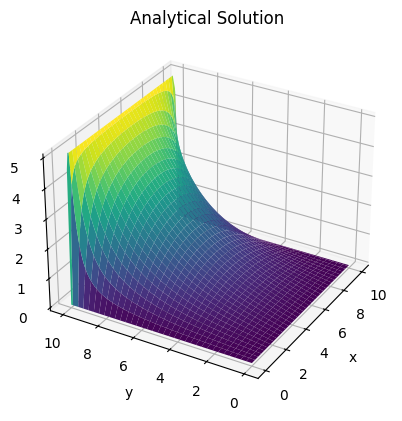

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

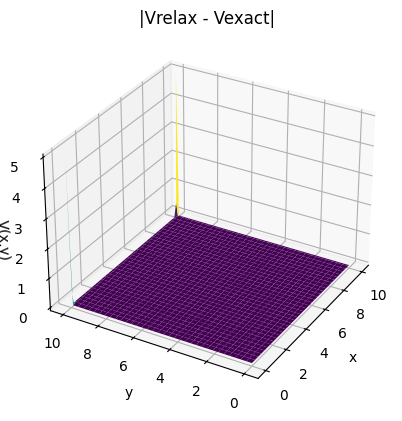

In [ ]:
def compareGraphs(step):
  def x0(y,z):
    return 0

  def xmax(y,z):
    return 0

  def y0(x,z):
    return 0

  def ymax(x,z):
    return 5
  Zr = Ze = 0
  Ze = graph_comp_func(step,1)

  X,Y,Zr,fig,ax = init_surface_cart(x0,xmax,y0,ymax, [0,10], [0,10],'Average',step)
  relax(0.000001,ax,X,Y,Zr)
  Z = abs(Zr - Ze)


  plt.clf()
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')

  ax.set_title("|Vrelax - Vexact|")
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('V(x,y)')
  ax.zaxis.labelpad = -3
  ax.view_init(elev=ax.elev, azim=ax.azim-90)
  ax.plot_surface(X,Y,Z,cmap="viridis")
  plt.show()

compareGraphs(0.1)

Error analysis

In [ ]:
def x0(y,z):
    return 0

def xmax(y,z):
  return 0

def y0(x,z):
  return 0

def ymax(x,z):
  return 5

def RMSE(threshold,step):


  X,Y,Zr,fig,ax = init_surface_cart(x0,xmax,y0,ymax, [0,10], [0,10],step)
  relax(threshold,ax,X,Y,Zr)
  Ze = graph_comp_func(step,False)
  rmse = 0
  for i in range(len(Ze[0])):
    for j in range(len(Ze)):
      rmse += (Ze[j,i]-Zr[j,i])**2

  rmse = (rmse/(len(Ze[0])*len(Ze)))**0.5

  return rmse


def mape(threshold,step):
  def x0(y,z):
    return 0

  def xmax(y,z):
    return 0

  def y0(x,z):
    return 0

  def ymax(x,z):
    return 5
  X,Y,Zr,fig,ax = init_surface_cart(x0,xmax,y0,ymax, [0,10], [0,10],0.1)
  relax(threshold,ax,X,Y,Zr)
  Ze = graph_comp_func(step,False)

  mape = 0
  for i in range(len(Ze[0])):
    for j in range(len(Ze)):
      if Ze[j,i] != 0:
        mape += abs(Ze[j,i]-Zr[j,i])/abs(Ze[j,i])
  mape /= (len(Ze[0])*len(Ze))
  return mape

def get_thresh_error(step,tmin,tmax,etype,guess):
  x = np.linspace(tmin,tmax,10)
  y = np.zeros_like(x)

  if etype == 'RMSE':
    y = [RMSE(threshold,step) for threshold in x]
  elif etype == 'MAPE':
    y = [mape(threshold,step) for threshold in x]

  plt.clf()
  plt.xlabel('Threshold')
  if etype == 'RMSE':
    plt.ylabel('RMSE')
    plt.title('RMSE vs Threshold')
  elif etype == 'MAPE':
    plt.ylabel('MAPE')
    plt.title('MAPE vs Threshold')
  plt.plot(x, y, color='blue', linestyle='-', linewidth=2)
  plt.tight_layout()
  plt.plot(x,y)


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

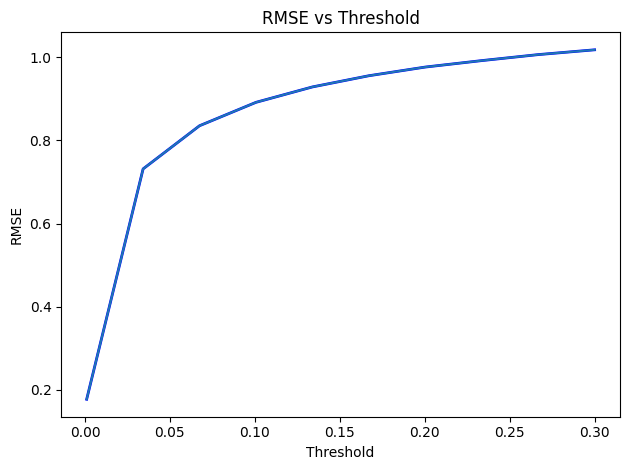

In [ ]:
get_thresh_error(0.1,0.001,0.3,'RMSE','Average')
#get_thresh_error(1,0.1,0.3,'MAPE','Average')

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

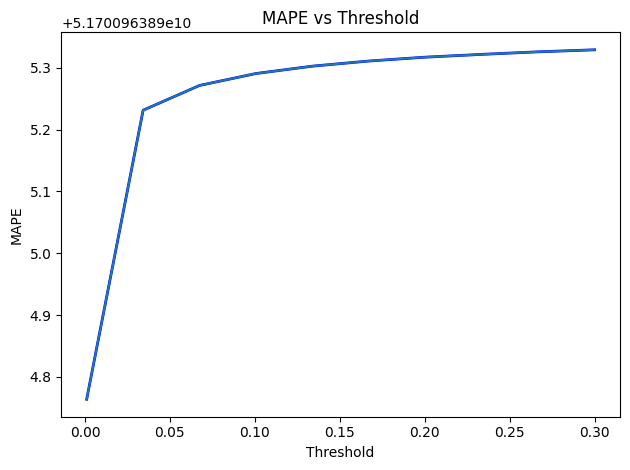

In [ ]:
get_thresh_error(0.1,0.001,0.3,'MAPE','Average')

In [ ]:

def get_thresh_runtime(step, tmin, tmax, guess):
    import time
    x = np.linspace(tmin, tmax, 5)
    y = np.zeros_like(x)

    for i, threshold in enumerate(x):
        start_time = time.time()

        def x0(y,z):
            return 0

        def xmax(y,z):
          return np.log(y+1)

        def y0(x,z):
          return np.sin(np.pi*x/10)

        def ymax(x,z):
          return 0
        X,Y,Zr,fig,ax = init_surface_cart(x0,xmax,y0,ymax, [0,10], [0,10],guess,step)
        relax(threshold,ax,X,Y,Zr)

        end_time = time.time()
        y[i] = end_time - start_time

        return y




<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

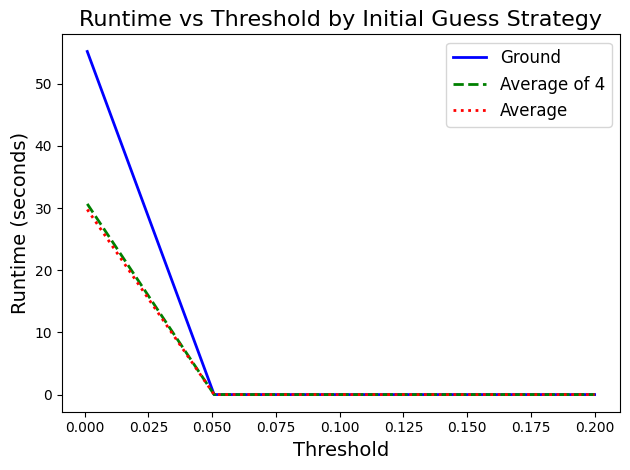

In [ ]:

y1 = get_thresh_runtime(0.1, 0.001, 0.05, 'Ground')
y2 = get_thresh_runtime(0.1, 0.001, 0.05, 'Average')
y3 = get_thresh_runtime(0.1, 0.001, 0.05, 'Average Plane')

x1 = np.linspace(0.001, 0.2, 5)

plt.clf()
plt.xlabel('Threshold')
plt.ylabel('Runtime (seconds)')
plt.plot(x1, y1, color='blue', linestyle='-', linewidth=2, label='Ground')
plt.plot(x1, y2, color='green', linestyle='--', linewidth=2, label='Average of 4')
plt.plot(x1, y3, color='red', linestyle=':', linewidth=2, label='Average')

plt.xlabel('Threshold', fontsize=14)
plt.ylabel('Runtime (seconds)', fontsize=14)

plt.title('Runtime vs Threshold by Initial Guess Strategy', fontsize=16)

plt.legend(loc='upper right', fontsize=12)

plt.tight_layout()

plt.show()
